<a href="https://colab.research.google.com/github/srg-lc/iddm/blob/main/LGBM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import lightgbm as lgb 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score



In [2]:
print("Iniciando...")
print("Carregando dataset...")
dataset = pd.read_csv('https://media.githubusercontent.com/media/srg-lc/iddm/main/data.csv', low_memory=False)




Iniciando...
Carregando dataset...


In [3]:
dataset['device_model'].unique()

array(['webcam.Samsung.SNH-1011N', 'laptop.Dell.Latitude_7400',
       'light_bulb.TP_Link.LB130', 'laptop.Dell.Latitude_E6430',
       'speaker.Sonos.One', 'doorbell.Amazon.Ring',
       'access_point.TP_Link.TL-WA901ND', 'webcam.Amcrest.IPM-721W',
       'smartphone.Samsung.Galaxy_Note_5', 'socket.Wemo.Insight',
       'smartphone.Samsung.Galaxy_Note_4',
       'streamer.Amazon.Fire_TV_Stick'], dtype=object)

In [4]:
#Filtrando Treino e predicao
data_training = dataset[dataset['partition'] == "training"]
data_training['partition'].unique()
data_predict = dataset[dataset['partition'] == "test"]
data_predict['partition'].unique()


array(['test'], dtype=object)

Fit e Transform devem ser aplicados apenas ao dataset de treino, no dataset de previsão, devo aplicar apenas o transform. Logo, fit e transform devem ser aplicados depois da separação de dados de treino e teste. 

In [5]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
number = number.fit(dataset['IPV4_DST_ADDR'])
data_training['IPV4_DST_ADDR'] = number.transform(data_training['IPV4_DST_ADDR'])
data_predict['IPV4_DST_ADDR'] = number.transform(data_predict['IPV4_DST_ADDR'])
number = number.fit(dataset['device_model'])
data_training['device_model'] = number.transform(data_training['device_model'])
data_predict['device_model'] = number.transform(data_predict['device_model'])
number = number.fit(dataset['IP'])
data_training['IP'] = number.transform(data_training['IP'])
data_predict['IP'] = number.transform(data_predict['IP'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [6]:
data_training.head()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,IP,DURATION,device_model,partition,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,IPV4_SRC_ADDR,MAC,category,type,date,inter_arrival_time
0,1.579047e+09,240.0,4.0,6999,5222.0,3696.0,1.579043e+09,6.0,0.0,2.0,831,4195.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.579048e+09
1,1.579047e+09,76.0,1.0,1833,123.0,4039.0,1.579043e+09,17.0,0.0,0.0,600,4216.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,2.100000e+01
2,1.579047e+09,120.0,2.0,7092,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,832,4213.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.000000e+01
3,1.579047e+09,76.0,1.0,1490,123.0,4040.0,1.579043e+09,17.0,0.0,0.0,348,4217.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,2.000000e+01
4,1.579047e+09,60.0,1.0,7092,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,832,4216.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.000000e+00


In [7]:
data_predict.head()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,IP,DURATION,device_model,partition,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,IPV4_SRC_ADDR,MAC,category,type,date,inter_arrival_time
171845,1.581638e+09,76.0,1.0,893,123.0,4242.0,1.581634e+09,17.0,0.0,0.0,156,4240.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,24.0
171846,1.581638e+09,120.0,2.0,7092,5222.0,1655.0,1.581634e+09,6.0,0.0,2.0,832,4237.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,6.0
171847,1.581638e+09,76.0,1.0,1798,123.0,4243.0,1.581634e+09,17.0,0.0,0.0,577,4239.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,24.0
171848,1.581638e+09,120.0,2.0,6933,5222.0,4816.0,1.581634e+09,6.0,0.0,2.0,831,4236.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,6.0
171849,1.581638e+09,60.0,1.0,6933,5222.0,4816.0,1.581634e+09,6.0,0.0,2.0,831,4240.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,21.0


In [8]:
data_training.head()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,IP,DURATION,device_model,partition,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,IPV4_SRC_ADDR,MAC,category,type,date,inter_arrival_time
0,1.579047e+09,240.0,4.0,6999,5222.0,3696.0,1.579043e+09,6.0,0.0,2.0,831,4195.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.579048e+09
1,1.579047e+09,76.0,1.0,1833,123.0,4039.0,1.579043e+09,17.0,0.0,0.0,600,4216.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,2.100000e+01
2,1.579047e+09,120.0,2.0,7092,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,832,4213.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.000000e+01
3,1.579047e+09,76.0,1.0,1490,123.0,4040.0,1.579043e+09,17.0,0.0,0.0,348,4217.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,2.000000e+01
4,1.579047e+09,60.0,1.0,7092,5222.0,3661.0,1.579043e+09,6.0,0.0,2.0,832,4216.0,11,training,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-01-15,1.000000e+00


In [9]:
data_predict.head()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,LAST_SWITCHED,PROTOCOL,SRC_TOS,TCP_FLAGS,IP,DURATION,device_model,partition,SRC_AS,DST_AS,INPUT_SNMP,OUTPUT_SNMP,IPV4_SRC_ADDR,MAC,category,type,date,inter_arrival_time
171845,1.581638e+09,76.0,1.0,893,123.0,4242.0,1.581634e+09,17.0,0.0,0.0,156,4240.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,24.0
171846,1.581638e+09,120.0,2.0,7092,5222.0,1655.0,1.581634e+09,6.0,0.0,2.0,832,4237.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,6.0
171847,1.581638e+09,76.0,1.0,1798,123.0,4243.0,1.581634e+09,17.0,0.0,0.0,577,4239.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,24.0
171848,1.581638e+09,120.0,2.0,6933,5222.0,4816.0,1.581634e+09,6.0,0.0,2.0,831,4236.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,6.0
171849,1.581638e+09,60.0,1.0,6933,5222.0,4816.0,1.581634e+09,6.0,0.0,2.0,831,4240.0,11,test,0.0,0.0,6.0,1.0,192.168.1.227,00:16:6C:7F:82:21,IoT,IoT,2020-02-14,21.0


In [10]:
# Atribuindo features a dataset de treino
dataset_ft = pd.DataFrame()
dataset_ft['FIRST_SWITCHED'] = data_training['FIRST_SWITCHED'] # Feature 10
dataset_ft['IN_BYTES'] = data_training['IN_BYTES'] # Feature 12
dataset_ft['IN_PKTS'] = data_training['IN_PKTS'] # Feature 13
dataset_ft['IPV4_DST_ADDR'] = data_training['IPV4_DST_ADDR'] # Feature 9
dataset_ft['L4_DST_PORT'] = data_training['L4_DST_PORT'] # Feature 0
dataset_ft['L4_SRC_PORT'] = data_training['L4_SRC_PORT'] # Feature 1
dataset_ft['SRC_TOS'] = data_training['SRC_TOS'] # Feature 2
dataset_ft['LAST_SWITCHED'] = data_training['LAST_SWITCHED'] # Feature 3 x
dataset_ft['PROTOCOL'] = data_training['PROTOCOL'] # Feature 8 x
dataset_ft['TCP_FLAGS'] = data_training['TCP_FLAGS'] # Feature 7 


In [11]:
# Atribuindo features a dataset de predicao
dataset_fp = pd.DataFrame()
dataset_fp['FIRST_SWITCHED'] = data_predict['FIRST_SWITCHED'] # Feature 10
dataset_fp['IN_BYTES'] = data_predict['IN_BYTES'] # Feature 12
dataset_fp['IN_PKTS'] = data_predict['IN_PKTS'] # Feature 13
dataset_fp['IPV4_DST_ADDR'] = data_predict['IPV4_DST_ADDR'] # Feature 9
dataset_fp['L4_DST_PORT'] = data_predict['L4_DST_PORT'] # Feature 0
dataset_fp['L4_SRC_PORT'] = data_predict['L4_SRC_PORT'] # Feature 1
dataset_fp['SRC_TOS'] = data_predict['SRC_TOS'] # Feature 2
dataset_fp['LAST_SWITCHED'] = data_predict['LAST_SWITCHED'] # Feature 3 x
dataset_fp['PROTOCOL'] = data_predict['PROTOCOL'] # Feature 8 x
dataset_fp['TCP_FLAGS'] = data_predict['TCP_FLAGS'] # Feature 7 

In [12]:
# Atribuindo valores do dataset de treino
X_train = dataset_ft.iloc[:, :].values #Pegar valores até a coluna de device-model
Y_train = data_training.iloc[:, 12].values # coluna device model deve ser utilizada como rótulos

In [13]:
# Atribuindo valores do dataset de predicao
X_test = dataset_fp.iloc[:, :].values #Pegar valores até a coluna de device-model
Y_test = data_predict.iloc[:, 12].values # coluna device model deve ser utilizada como rótulo

Configurando parâmetros para treino...
Treinando...
Salvando modelo...


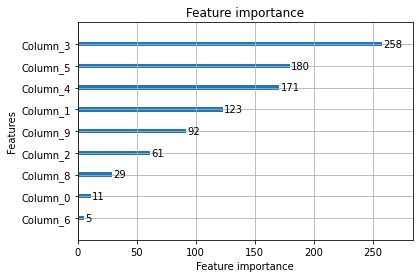

In [14]:
# Fase de treinamento
d_train = lgb.Dataset(X_train, label=Y_train)
print("Configurando parâmetros para treino...")
params = {}
params['num_leaves'] = 32 #definido no artigo
#params['min_data'] = 50 # parametros não definidos no artigo, portanto, default
#params['max_depth'] = 10
print("Treinando...")
clf = lgb.train(params, d_train, 30) # max_iterations definido no artigo
lgb.plot_importance(clf)
print("Salvando modelo...")
clf.save_model('model.txt')

In [15]:
dataset_fp.head()

,FIRST_SWITCHED,IN_BYTES,IN_PKTS,IPV4_DST_ADDR,L4_DST_PORT,L4_SRC_PORT,SRC_TOS,LAST_SWITCHED,PROTOCOL,TCP_FLAGS
171845,1.581638e+09,76.0,1.0,893,123.0,4242.0,0.0,1.581634e+09,17.0,0.0
171846,1.581638e+09,120.0,2.0,7092,5222.0,1655.0,0.0,1.581634e+09,6.0,2.0
171847,1.581638e+09,76.0,1.0,1798,123.0,4243.0,0.0,1.581634e+09,17.0,0.0
171848,1.581638e+09,120.0,2.0,6933,5222.0,4816.0,0.0,1.581634e+09,6.0,2.0
171849,1.581638e+09,60.0,1.0,6933,5222.0,4816.0,0.0,1.581634e+09,6.0,2.0


In [16]:
# Testando treinamento
print("Preparando Predição...")
clf = lgb.Booster(model_file='model.txt')
ypred = clf.predict(X_test)
print(f'Resultado da predicao: {ypred}')
print(f'Rótulos (device_model): {Y_test}')
ypred = ypred.round(decimals=0, out=None)
accuracy = accuracy_score(ypred, Y_test)*100
print(f'Acerto do modelo: {round(accuracy,2)}%')

Preparando Predição...
Resultado da predicao: [10.75807968 10.83876683 10.75807968 ...  8.91141894  8.91141894
  8.91141894]
Rótulos (device_model): [11 11 11 ...  9  9  9]
Acerto do modelo: 93.91%


In [17]:
# Relatorio de metricas
print(classification_report(ypred, Y_test))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.94      0.55      0.70      5320
         2.0       0.01      0.07      0.02       176
         3.0       0.00      0.00      0.00       246
         4.0       1.00      0.95      0.98     20448
         5.0       0.79      0.81      0.80     12193
         6.0       0.16      0.26      0.20      1489
         7.0       0.93      0.98      0.96     59753
         8.0       0.99      0.78      0.87     18935
         9.0       0.90      0.99      0.94     27928
        10.0       1.00      0.95      0.97     94894
        11.0       0.97      1.00      0.98     44745

    accuracy                           0.94    286127
   macro avg       0.64      0.61      0.62    286127
weighted avg       0.95      0.94      0.94    286127



In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, ypred)
print(confusion_matrix(Y_test, ypred))

[[    0  2335   100    55    12     0     0     0     0     0     0     3]
 [    0  2952    39    20    68    39     6    14    14     1     3     0]
 [    0     1    12   136   371   305    83    26    12     0     0     0]
 [    0     0     0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0 19518     0     0     0     0     0     0     2]
 [    0    32     7    16   366  9899   819   556   760    34     0     1]
 [    0     0    18    12    96  1763   393    85    57     5     0     0]
 [    0     0     0     0     0     0     0 58665   457     0  3745     0]
 [    0     0     0     1     9    21     2    10 14750     0     0    39]
 [    0     0     0     6     8   166   184   366  2371 27516     0     2]
 [    0     0     0     0     0     0     2     4    47   358 90298     0]
 [    0     0     0     0     0     0     0    27   467    14   848 44698]]


In [19]:
unique, counts = np.unique(Y_test, return_counts=True)

np.asarray((unique, counts)).T

array([[    0,  2505],
       [    1,  3156],
       [    2,   946],
       [    4, 19520],
       [    5, 12490],
       [    6,  2429],
       [    7, 62867],
       [    8, 14832],
       [    9, 30619],
       [   10, 90709],
       [   11, 46054]])

In [20]:
# # Metrica usada no artigo e que não encontrei como rodar sem onehotencoder
# from sklearn.metrics import precision_score
# print(average_precision_score(ypred, Y_test))

Codigo para converter ip em inteiro
import socket, struct def ip2long(ip): packedIP = socket.inet_aton(ip) return struct.unpack("!L", packedIP)[0]